# Practice Plotting

(0.0, 6.0, 0.0, 20.0)

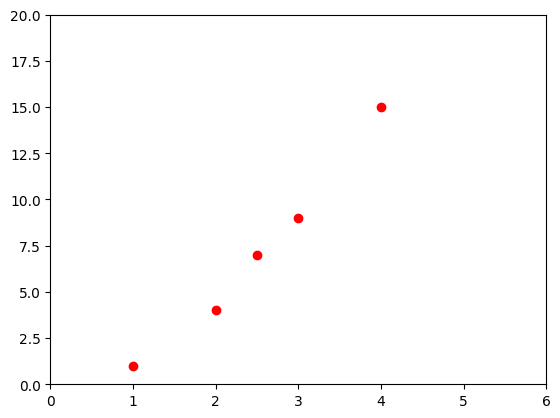

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

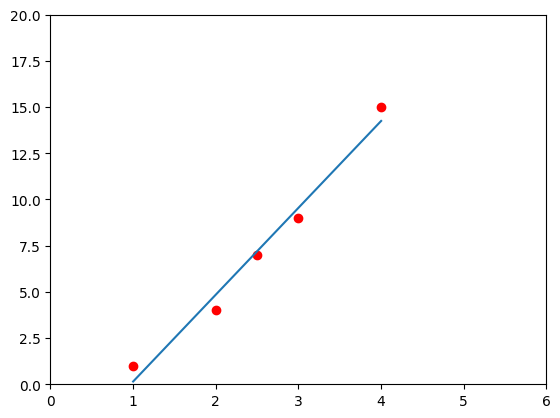

In [ ]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

# Practice TensorFlow

## Resources

Keras datasets:
https://hackernoon.com/10-best-keras-datasets-for-building-and-training-deep-learning-models


## Linear Regression

In [1]:
!pip install -q sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [6]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [1]:
%tensorflow_version 2.x # only required for notebook

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow.compat.v1 as tf1

import tensorflow as tf

In [4]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [5]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [6]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dftrain.shape

(627, 9)

In [ ]:
y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


<Axes: >

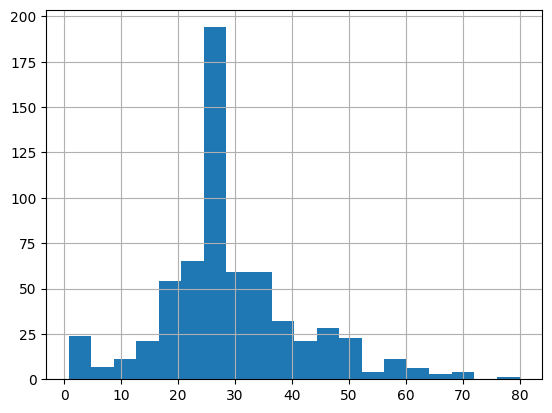

In [ ]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

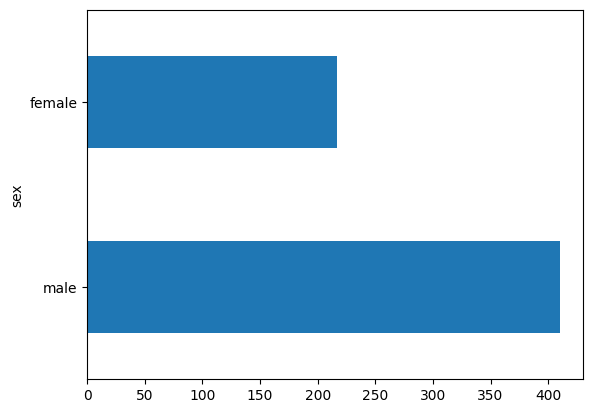

In [ ]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: ylabel='class'>

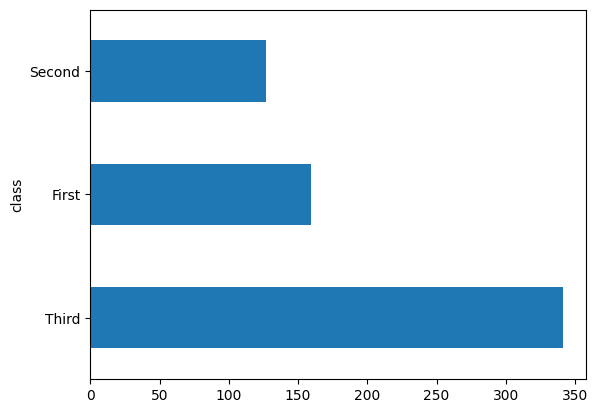

In [ ]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

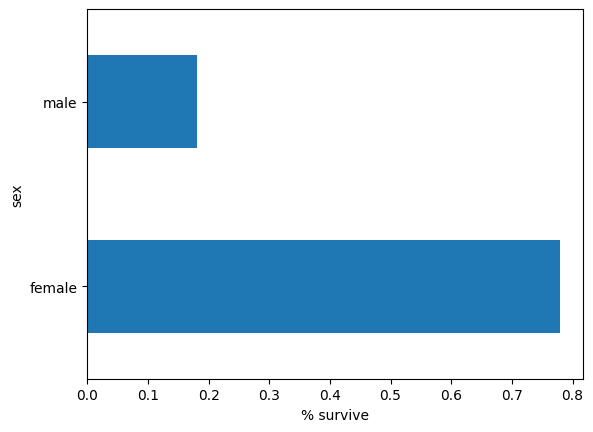

In [ ]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [7]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))


#work on changing this to updated tf.keras.utils.FeatureSpace
for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [8]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)


In [21]:
# Create Model
#linear_est = tf1.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier


# above didn't work, trying to adjust for current libraries
linear_model = tf.keras.Sequential([tf.keras.layers.Dense(1)])
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.05)
linear_model.compile(optimizer=optimizer, loss='mse')

In [24]:
history = linear_model.fit(feature_columns)

ValueError: Unrecognized data type: x=[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, default_value=-1, num_oov_buckets=0), NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='fare', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)] (of type <class 'list'>)

## Train ML Model Using Prebuilt Dataset

https://www.tensorflow.org/tutorials/quickstart/beginner

In [25]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [27]:
# Load a dataset: MNIST, and scale values to [0,1] by dividing by 255.0 (and converts to float)
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
x_train[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [40]:
# Build a machine learning model (Sequential - useful for layers where each has one input tensor and one output tensor)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(28)
])

In [49]:
predict = model(x_train[:1]).numpy()
predict
tf.nn.softmax(predict).numpy() # converts to probabilites

array([[0.04752586, 0.02491637, 0.02894111, 0.03962401, 0.05495439,
        0.02038455, 0.06346229, 0.02291042, 0.04961918, 0.04896017,
        0.03923311, 0.0191387 , 0.02373481, 0.01904249, 0.03644374,
        0.03257205, 0.02474686, 0.04223377, 0.03726323, 0.01916285,
        0.01527701, 0.02004771, 0.08761244, 0.01333341, 0.02583631,
        0.05940318, 0.05419917, 0.02942081]], dtype=float32)

In [50]:
# Define a loss function (something to do with the negative probability, look into later)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predict).numpy()

3.8929782

In [52]:
# Configure and compile the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [53]:
# Train and evaluate the model
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8477 - loss: 0.5357
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9548 - loss: 0.1562
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9655 - loss: 0.1153
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9739 - loss: 0.0864
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9768 - loss: 0.0773
313/313 - 1s - 2ms/step - accuracy: 0.9760 - loss: 0.0803


[0.0802517831325531, 0.9760000109672546]

In [55]:
# Wrap model and attach softmax to have model return a probability
prob_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])
prob_model(x_test[:5])

<tf.Tensor: shape=(5, 28), dtype=float32, numpy=
array([[2.11004908e-06, 1.06776774e-08, 1.37499756e-05, 7.51415151e-04,
        6.59906851e-11, 6.43603482e-09, 9.50775442e-14, 9.99223709e-01,
        5.52603581e-07, 8.46466082e-06, 6.26062949e-13, 1.51404686e-13,
        8.25878374e-13, 4.15298357e-13, 4.87867328e-14, 7.00838964e-13,
        1.19018551e-13, 1.12879454e-12, 1.78287323e-14, 3.60392868e-14,
        4.89120734e-13, 3.81705674e-14, 7.60010978e-13, 8.85819670e-14,
        1.16055223e-13, 9.62397683e-14, 7.49373599e-13, 1.14428530e-12],
       [6.62356115e-07, 5.38604218e-04, 9.99439657e-01, 1.86199140e-05,
        2.52990160e-16, 3.49338016e-08, 2.83853674e-09, 5.06522385e-12,
        2.40545046e-06, 9.68268543e-13, 5.13926314e-15, 6.27874353e-15,
        7.92533662e-15, 8.84793083e-15, 9.95874085e-15, 2.36409140e-15,
        2.25362115e-15, 9.03911464e-15, 3.14754224e-15, 1.70767060e-14,
        4.15639660e-15, 2.35883853e-16, 3.50544861e-15, 4.69841711e-16,
        2.5311

## Train Model Using CSV Data and Mixed Data Types
Titanic Example

https://www.tensorflow.org/tutorials/load_data/csv

In [138]:
# Load data from CSV into Dataframe
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()
list(titanic.columns)

['survived',
 'sex',
 'age',
 'n_siblings_spouses',
 'parch',
 'fare',
 'class',
 'deck',
 'embark_town',
 'alone']

In [58]:
titanic.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


In [59]:
titanic.shape

(627, 10)

In [68]:
# Make Dataframe Usable
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')
titanic_features

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [69]:
# Handle the different data types and ranges individually
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, name=alone>}

In [74]:
# Normalize numeric inputs and map string inputs to integer indexes
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = tf.keras.layers.Concatenate()(list(numeric_inputs.values()))
norm = tf.keras.layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

print(all_numeric_inputs)

preprocessed_inputs = [all_numeric_inputs]

for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue

  lookup = tf.keras.layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)


<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_55>
[<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_55>, <KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_57>, <KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_59>, <KerasTensor shape=(None, 9), dtype=float32, sparse=False, name=keras_tensor_61>, <KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_63>, <KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_65>]


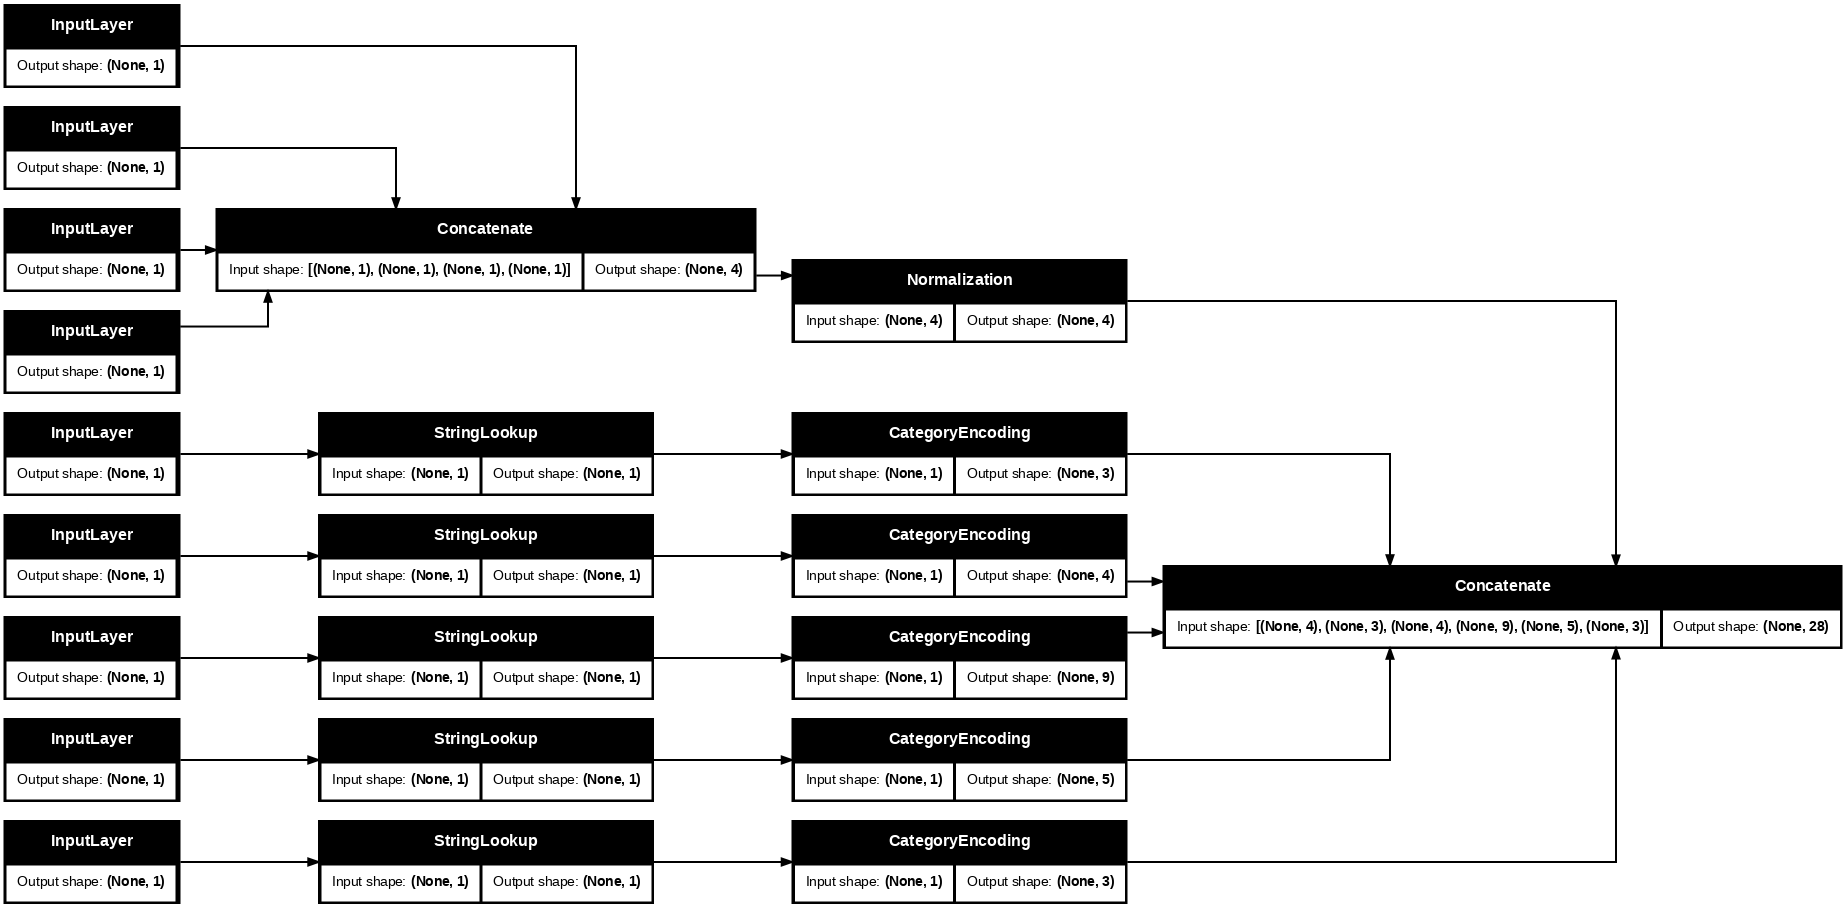

In [76]:
# Build a model that handles the preprocessing
preprocessed_inputs_cat = tf.keras.layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

In [77]:
# Convert data to dictionary of tensors
titanic_features_dict = {name: np.array(value)
                         for name, value in titanic_features.items()}
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.6104149 ,  0.39519805, -0.4790527 , -0.4974028 ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ]], dtype=float32)>

In [142]:
# Build model using preprocessed data
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

In [143]:
# Train the model
titanic_model.fit(x=titanic_features_dict, y=titanic_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5618 - loss: 0.6630
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7490 - loss: 0.5706
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 0.5234
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4741 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8288 - loss: 0.4558
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8282 - loss: 0.4394
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8548 - loss: 0.4093
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8398 - loss: 0.4040
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8429 - loss: 0.3986
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8433 - loss: 0.3955


In [144]:
# Save and reload the model
titanic_model.save('test.keras')
reloaded = tf.keras.models.load_model('test.keras')

# Proof the model and the reloaded model are identical
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[0.12281536]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.12281536]], shape=(1, 1), dtype=float32)


In [145]:
# Evaluate the model using test data
titanic_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
titanic_test_y = titanic_test.pop('survived')

# Convert data to dictionary of tensors
titanic_test_dict = {name: np.array(value)
                         for name, value in titanic_test.items()}

test_loss, test_acc = titanic_model.evaluate(titanic_test_dict, titanic_test_y, verbose=2)
print(test_loss, test_acc)

9/9 - 0s - 39ms/step - accuracy: 0.7841 - loss: 0.4502


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:707: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


0.45022106170654297 0.7840909361839294


In [146]:
display(titanic_test)
display(titanic_test_y)

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y
...,...,...,...,...,...,...,...,...,...
259,female,25.0,0,1,26.0000,Second,unknown,Southampton,n
260,male,33.0,0,0,7.8958,Third,unknown,Southampton,y
261,female,39.0,0,5,29.1250,Third,unknown,Queenstown,n
262,male,27.0,0,0,13.0000,Second,unknown,Southampton,y


,survived
0,0
1,0
2,1
3,1
4,1
...,...
259,1
260,0
261,0
262,0


In [147]:
display(titanic)
display(titanic_labels)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


,survived
0,0
1,1
2,1
3,1
4,0
...,...
622,0
623,0
624,1
625,0


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
1


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

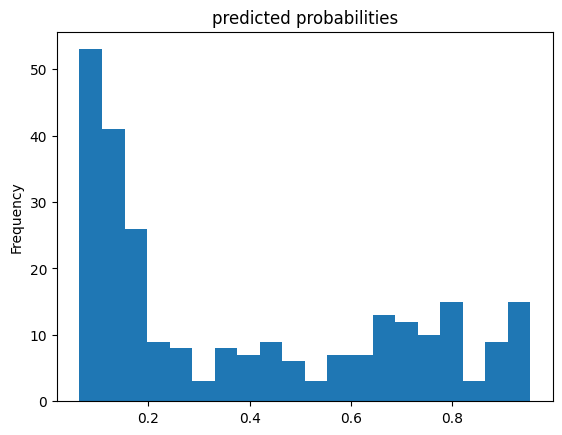

In [159]:
# Predict the survival probabilities using the model
#prob_model = tf.keras.Sequential([tf.reshape(titanic_model, [-1]), tf.keras.layers.Softmax()])

predict = titanic_model.predict(titanic_test_dict)
predict

print(titanic_test_y[2])

probs = pd.Series([pred[0] for pred in predict])
#act = pd.Series([i for i in titanic_test_y])
probs.plot(kind='hist', bins=20, title='predicted probabilities')